In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# !pip install tensorboardcolab

In [37]:
import h5py
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

In [32]:
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [33]:
h5f.close()

In [34]:
x_train.shape,y_train.shape,x_test.shape

((42000, 32, 32), (42000,), (18000, 32, 32))

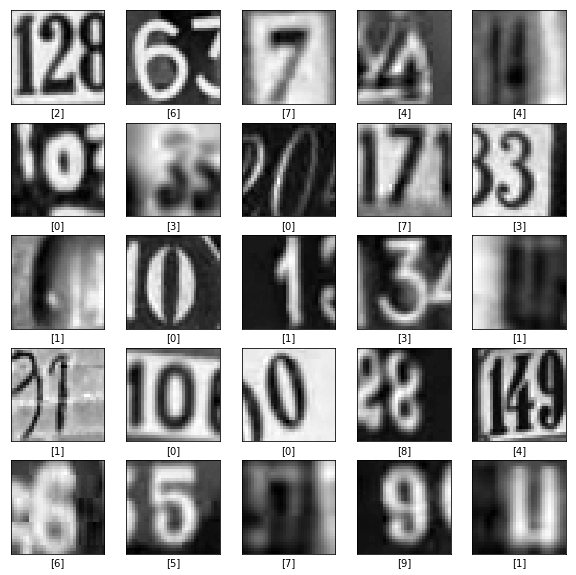

In [38]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap= plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [39]:
import cv2

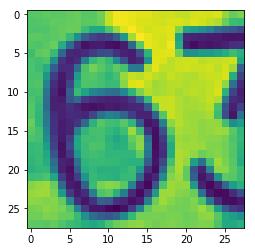

In [47]:
plt.imshow(cv2.resize(x_train[1],dsize=(28,28),interpolation=cv2.INTER_CUBIC))

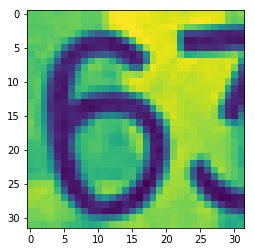

In [45]:
plt.imshow(x_train[1])

In [50]:
x_train_resized =  np.zeros((x_train.shape[0],28,28), dtype=np.float32)
for i in range(x_train.shape[0]):
    x_train_resized[i,:,:] = cv2.resize(x_train[i],dsize=(28,28))
x_test_resized = np.zeros((x_test.shape[0],28,28), dtype=np.float32)
for i in range(x_test.shape[0]):
    x_test_resized[i,:,:] = cv2.resize(x_test[i],dsize=(28,28))

In [59]:
x_train_resized.shape,x_test_resized.shape

((42000, 28, 28), (18000, 28, 28))

In [52]:
del x_train
del x_test

In [64]:
img_rows, img_cols = 28, 28
x_train = x_train_resized.reshape(x_train_resized.shape[0],img_rows,img_cols,1)
x_test = x_test_resized.reshape(x_test_resized.shape[0],img_rows,img_cols,1)

In [67]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [66]:
x_train.shape

(42000, 28, 28, 1)

In [68]:
x_train.max()

0.9999

In [69]:
batch_size = 128
num_classes = 10
epochs = 12
input_shape = (img_rows, img_cols, 1)

In [70]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [72]:
y_train.shape

(42000, 10)

In [74]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = input_shape,name='conv_1'),
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',name = 'conv_2'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='max_1'),
                             tf.keras.layers.Dropout(0.25,name='drop_'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu',name='dense_1'),
                             tf.keras.layers.Dropout(0.5,name='drop_2'),
                             tf.keras.layers.Dense(num_classes,activation='softmax',name='dense_2')
                              ])

W1019 15:33:14.983111 18772 deprecation.py:506] From F:\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [77]:
for layer in model.layers:
    print(layer.name)
    print(layer.trainable)

conv_1
True
conv_2
True
max_1
True
drop_
True
flatten
True
dense_1
True
drop_2
True
dense_2
True


In [88]:
for layer in model.layers:
    if 'dense' not in layer.name:
        layer.trainable = False
    
        

In [89]:
model.load_weights('cnn_mnist_weights (1) (1).h5')

In [90]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [91]:
from time import time
from tensorflow.keras.callbacks import TensorBoard

In [92]:
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001,patience=10)


In [ ]:
model.fit(x_train,y_train,
         batch_size=batch_size,
         verbose=1,epochs = epochs,
         validation_data=(x_test,y_test)
#          callbacks = [early_stopping]
                   )

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
42000/42000 [==============================] - 41s 977us/sample - loss: 1.3469 - acc: 0.5723 - val_loss: 0.8724 - val_acc: 0.7663
Epoch 2/12
42000/42000 [==============================] - 37s 881us/sample - loss: 0.8913 - acc: 0.7305 - val_loss: 0.6993 - val_acc: 0.8117
Epoch 3/12
42000/42000 [==============================] - 37s 869us/sample - loss: 0.7468 - acc: 0.7730 - val_loss: 0.6260 - val_acc: 0.8293
Epoch 4/12
42000/42000 [==============================] - 36s 868us/sample - loss: 0.6707 - acc: 0.7953 - val_loss: 0.5865 - val_acc: 0.8374
Epoch 5/12
42000/42000 [==============================] - 35s 829us/sample - loss: 0.6177 - acc: 0.8117 - val_loss: 0.5520 - val_acc: 0.8476
Epoch 6/12
42000/42000 [==============================] - 40s 959us/sample - loss: 0.5754 - acc: 0.8221 - val_loss: 0.5292 - val_acc: 0.8528
Epoch 7/12
42000/42000 [==============================] - 37s 882us/sample - loss: 0.5444 - acc: 0.8307 